# CEDA DataPoint - Demonstration

The CEDA DataPoint module wraps both the ``pystac_client`` and ``xarray`` packages into a single container for searching and accessing data. This notebook shows how methods function in DataPoint.

In [1]:
from datapoint import DataPointClient

client = DataPointClient(org='CEDA') # All public connection kwargs are known by default for CEDA

In [2]:
# Same as normal for pystac_client

client.list_collections()


STACTypeError: JSON (id = cci) does not represent a CollectionClient instance.

In [3]:

client.list_search_terms()

cmip6:
 - datetime, start_datetime, end_datetime, access, index_node, latest, pid, replica, retracted, instance_id, citation_url, variable_long_name, variable_units, cf_standard_name, activity_id, data_specs_version, experiment_title, frequency, further_info_url, grid, grid_label, institution_id, mip_era, source_id, source_type, experiment_id, sub_experiment_id, nominal_resolution, table_id, variable_id, variant_label, levels, updated, created
cordex:
 - datetime, start_datetime, end_datetime, access, index_node, latest, pid, replica, retracted, file_count, size, variable_id, instance_id, variable_long_name, variable_units, cf_standard_name, driving_experiment_name, rcm_version, experiment_familys, product, domain, driving_model, time_frequency, experiment, project, institute, ensemble, rcm_name, updated, created
land_cover:
 - datetime, updated, start_datetime, end_datetime, license, proj:code, proj:transform, TileSize, version, date_created, spatial_resolution, geospatial_lat_resolut

In [4]:
item_search = client.search(
    collections=['cmip6'],
    max_items=10,
)

In [5]:
item_search

<DataPointSearch>

In [5]:
item_search.cloud_assets()

<CMIP6.ScenarioMIP.THU.CIESM.ssp585.r1i1p1f1.Amon.rsus.gr.v20200806: reference_file>
<CMIP6.ScenarioMIP.THU.CIESM.ssp585.r1i1p1f1.Amon.rlus.gr.v20200806: reference_file>
<CMIP6.ScenarioMIP.CSIRO.ACCESS-ESM1-5.ssp126.r1i1p1f1.day.uas.gn.v20210318: reference_file>
<CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp585.r1i1p1f1.day.pr.gn.v20210317: reference_file>
<CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp126.r1i1p1f1.day.pr.gn.v20210317: reference_file>
<CMIP6.ScenarioMIP.CSIRO.ACCESS-ESM1-5.ssp585.r1i1p1f1.day.rsds.gn.v20210318: reference_file>
<CMIP6.ScenarioMIP.CSIRO.ACCESS-ESM1-5.ssp585.r1i1p1f1.day.hurs.gn.v20210318: reference_file>
<CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp585.r1i1p1f1.day.tas.gn.v20210317: reference_file>
<CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp585.r1i1p1f1.day.psl.gn.v20210317: reference_file>
<CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp126.r1i1p1f1.day.tasmin.gn.v20210317: reference_file>


In [6]:
# Assemble xarray and other datasets
ds = item_search[0].open_dataset(combine=False)
# Combine products/variables into a single dataset?

In [7]:
ds

<xarray.Dataset> Size: 228MB
Dimensions:    (lat: 192, bnds: 2, lon: 288, time: 1032)
Coordinates:
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time       (time) object 8kB 4029-01-16 12:00:00 ... 4114-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    lat_bnds   (lat, bnds) float64 3kB dask.array<chunksize=(192, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
    rsus       (time, lat, lon) float32 228MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    time_bnds  (time, bnds) object 17kB dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   735110.0
    branch_time_in_parent:  735110.0
    cmor_version:           3.6.0
    ...                     ...
    table_id:               Amon
    table_info:             Creation Date:(20 February 2019) MD5:510997cd0a2c...
    title:                  CIESM output prepared for CMIP6
    tracking_id:            hdl:21.14100/26602daf-2379-491b-ad98-2ebb2f581db7
    variable_id:            rsus
    variant_label:          r1i1p1f1

In [8]:
%%time
result = ds['rsus'].isel(time=slice(0,5)).mean(dim='time')

CPU times: user 4.92 ms, sys: 0 ns, total: 4.92 ms
Wall time: 4.88 ms


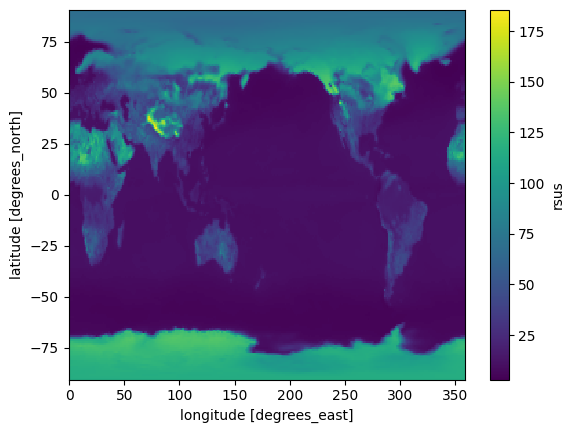

In [9]:
result.plot()